# ch04.03. 기대값과 분산
---
* 날짜: 2022.05.06
* 이름: 윤태우

## 학습내용
    - 기대값
    - 분산
    - 공분산
    - 상관계수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **| 기댓값**

\begin{align}
\mu_X = \text{E}[X] = \sum_{x_i \in \Omega} x_ip(x_i) 
\end{align}


In [2]:
def E(X, P= []) : # X,P는 넘파이 배열 (바로 계산 가능하기 때문)
  
    if not len(P) :        # P의 길이가 없을떄 즉, E(X, P) 에서 P가 입력되지 않았을 때
      P = np.array([1/len(X)]*len(X))
      #print(P)
    return np.sum(X*P)

In [3]:
X = np.array([1,2])
P = np.array([0.2,0.8])
E(X)

1.5

#### **예제 01. 공정한 주사위**



In [4]:
X = np.arange(1,7)
E(X)

3.5

#### **예제 02. 공정하지 않은 주사위**

짝수가 나올 확률이 홀수가 나올 확률의 두배인 주사위의 기대값을 구하세요.

In [5]:
X = np.arange(1,7)
P = np.array([1/9,2/9,1/9,2/9,1/9,2/9])
E(X,P)

3.666666666666666

#### **예제 03. 기대값의 성질**

X, Y, c 가 아래와 같이 주어졌을 때,
```
X = np.array([1,2,3,4])
Y = np.array([10,20,30,40])
c = np.array([4])
```

다음을 구하세요
```
E(X)
E(Y)
E(c)
E(X+Y)
E(X)+E(Y)
E(4X+3)
4E(X)+3
```

In [6]:
X = np.array([1,2,3,4])
Y = np.array([10,20,30,40])
c = np.array([4])

In [7]:
print(f'E(X) = {E(X)}, E(Y) = {E(Y)}, E(c) = {E(c)}, E(X+Y) = {E(X+Y)}, E(X)+E(Y) = {E(X)+E(Y)}, E(4X+3) = {E(4*X+3)}, 4E(X)+3 = {4*E(X)+3}')

E(X) = 2.5, E(Y) = 25.0, E(c) = 4.0, E(X+Y) = 27.5, E(X)+E(Y) = 27.5, E(4X+3) = 13.0, 4E(X)+3 = 13.0


#### **예제 04. 시험 성적**

학생 네명의 시험 성적이 다음과 같을 때 총합점수의 평균(국어+수학) 을 두가지 방법으로 구하세요.

```
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
```

In [8]:
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])

In [9]:
# 국어와 수학의 평균 각각을 구하고 그 값을 더함.

mean1 = sum([np.mean(X_국어),np.mean(X_수학)])
mean1

130.0

In [10]:
# E(X) (기대값)을 이용하여 구함.

E(X_국어 + X_수학)

130.0

### **| 분산**

\begin{align}
V(X) = E[(X-E[X])^2]
\end{align}


In [11]:
def V(X, P=[]) :
  if not len(P) :
    P = np.array([1/len(X)]*len(X))
  return E(  ( X - E(X, P) )**2  )

In [12]:
X = np.array([1,2,3])
P = np.array([1/10, 1/10, 8/10])
print(E(X), V(X))  # P가 똑같은 확률일 때
print(E(X, P), V(X, P))  # P가 다른 확률일 때

2.0 0.6666666666666666
2.7 1.156666666666667


#### **예제 01. 동전 던지기**

두개의 동전을 던졌을 때 앞면이 나온 횟수를 확률 변수 X라 정의합니다.

다음을 구하세요.

```
X
P
E(X)
V(X)
```


In [13]:
X = np.arange(3)
P = np.array([1/4,2/4,1/4])
print(f'P = {P} E(X) = {E(X)} V(X) = {V(X)}')

P = [0.25 0.5  0.25] E(X) = 1.0 V(X) = 0.6666666666666666


#### **예제 02. 분산의 성질**


X,Y 가 아래와 같이 주어졌을 때

```
X = np.array([1,2,3,4,5,6,7,8,9])
c = np.array([10])
```

다음을 구하세요.

```
V(X)
V(c)
V(2X)
V(2X-2)
4 x V(X)
```

In [14]:
X = np.array([1,2,3,4,5,6,7,8,9])
c = np.array([10])
print(f'V(X) = {V(X)}, V(c) = {V(c)}, V(2X) = {V(2*X)}, V(2X-2) = {V(2*X-2)}, 4*V(X) = {4*V(X)}')

V(X) = 6.666666666666666, V(c) = 0.0, V(2X) = 26.666666666666664, V(2X-2) = 26.666666666666664, 4*V(X) = 26.666666666666664


#### **예제 03. 시험 성적**

학생 네명의 시험 성적이 다음과 같습니다.
```
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
```

다음을 구하세요.
```
V(X_국어)
V(X_수학)
V(5*X_국어)
5*5*V(X_국어)
```


In [15]:
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
print(f'V(X_국어) = {V(X_국어)}, V(X_수학) = {V(X_수학)}, V(5X_국어) = {V(5*X_국어)}, 5*5*V(X_국어) = {5*5*V(X_국어)}')


V(X_국어) = 250.0, V(X_수학) = 200.0, V(5X_국어) = 6250.0, 5*5*V(X_국어) = 6250.0


### **| 공분산**


\begin{align}
\text{Cov}(X, Y) = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]
\tag{7.5.3}
\end{align}

In [16]:
def Cov(X,Y,P_X = [],P_Y =[]) :

  if not len(P_X) :
    P_X = np.array([1/len(X)]*len(X))
  elif not len(P_Y) :
    P_Y = np.array([1/len(X)]*len(X))
  elif not len(P_X) and not len(P_Y) :
    P_X = np.array([1/len(X)]*len(X))
    P_Y = np.array([1/len(X)]*len(X))

  return E(  (X-E(X,P_X))*(Y-E(Y,P_Y)) )

In [17]:
X = np.array([1,4,7,9])
Y = np.array([7,8,9,10])
Cov(X,Y)

3.375

### **| 상관계수**


* 피어슨(Pearson) 상관계수

\begin{align}
\rho[X,Y] =  \dfrac{\text{Cov}[X, Y]}{\sqrt{\text{V}[X] \cdot \text{V}[Y]}}
\end{align}

\begin{align}
-1 \leq \rho \leq 1
\end{align}




In [18]:
def Rho(X,Y, P_X=[], P_Y=[]) :
  if not len(P_X) :
    P_X = np.array([1/len(X)]*len(X))
  elif not len(P_Y) :
    P_Y = np.array([1/len(X)]*len(X))
  elif not len(P_X) and not len(P_Y) :
    P_X = np.array([1/len(X)]*len(X))
    P_Y = np.array([1/len(X)]*len(X))  
  return Cov(X,Y)/(V(X)*V(Y))**(1/2)

In [19]:
X = np.array([10,1,4,1,2,3,5])
Y = np.array([9,0,4,2,3,4,5])
Rho(X,Y)

0.9610473065474658

#### **예제 01. 두 뽑기의 확률**

두 뽑기 A, B에서 나오는 숫자들의 확률이 아래와 같을 때 X와Y의 공분산과 상관계수를 구하세요.
```
X = [0,1,2]
P(X) = [1/5, 2/5, 2/5]
Y - [0, 1, 2]
P(Y) = [1/5, 3/5, 1/5]
```

In [20]:
class Func():
  def E(self, X, P=[]) : # X,P는 넘파이 배열 (바로 계산 가능하기 때문)
    self.X = X
    self.P = P
    if not len(P) :        # P의 길이가 없을떄 즉, E(X, P) 에서 P가 입력되지 않았을 때
      P = np.array([1/len(X)]*len(X))
    return np.sum(X*P)

  def V(self, X, P=[]) :
    self.X = X
    self.P = P
    if not len(P) :
      P = np.array([1/len(X)]*len(X))
    return E(  ( X - E(X, P) )**2  )

  def Cov(self, X, Y, P_X = [], P_Y =[]) :
    self.X = X
    self.Y = Y
    self.P_X = P_X
    self.P_Y = P_Y
    if not len(P_X) :
      P_X = np.array([1/len(X)]*len(X))
    elif not len(P_Y) :
      P_Y = np.array([1/len(X)]*len(X))
    elif not len(P_X) and not len(P_Y) :
      P_X = np.array([1/len(X)]*len(X))
      P_Y = np.array([1/len(X)]*len(X))
    return E(  (X-E(X,P_X))*(Y-E(Y,P_Y)) )

  def Rho(self, X, Y, P_X=[], P_Y=[]) :
    self.X = X
    self.Y = Y
    self.P_X = P_X
    self.P_Y = P_Y
    if not len(P_X) :
      P_X = np.array([1/len(X)]*len(X))
    elif not len(P_Y) :
      P_Y = np.array([1/len(X)]*len(X))
    elif not len(P_X) and not len(P_Y) :
      P_X = np.array([1/len(X)]*len(X))
      P_Y = np.array([1/len(X)]*len(X))  
    return Cov(X,Y)/(V(X)*V(Y))**(1/2)

f = Func()

In [21]:
X = np.array([0,1,2])
P_X = np.array([1/5, 2/5, 2/5])
Y = np.array([0, 1, 2])
P_Y = np.array([1/5, 3/5, 1/5])

In [22]:

print(f'공분산 = {f.Cov(X,Y,P_X,P_Y)}  상관계수 = {f.Rho(X,Y,P_X,P_Y)}')

공분산 = 0.6666666666666666  상관계수 = 1.0


#### **예제 02. 표본 그리기 1**

아래 코드는 표본을 10000개 추출 합니다.



```
x, y = np.random.multivariate_normal([0, 0], [[1, a], [a, 1]], 10000).T
x.shape, y.shape
```

1. a 값이 `-1,0.7,0.3,0.01,-0.3,-0.7,-1` 일 때 x, y의 표본쌍 7개의 스캐터 플롯을 그리고, 
2. 각 경우에 x, y의 상관계수를 구하세요.


(10000,) (10000,) 7
(10000,) (10000,) 7
(10000,) (10000,) 7
(10000,) (10000,) 7
(10000,) (10000,) 7
(10000,) (10000,) 7
(10000,) (10000,) 7


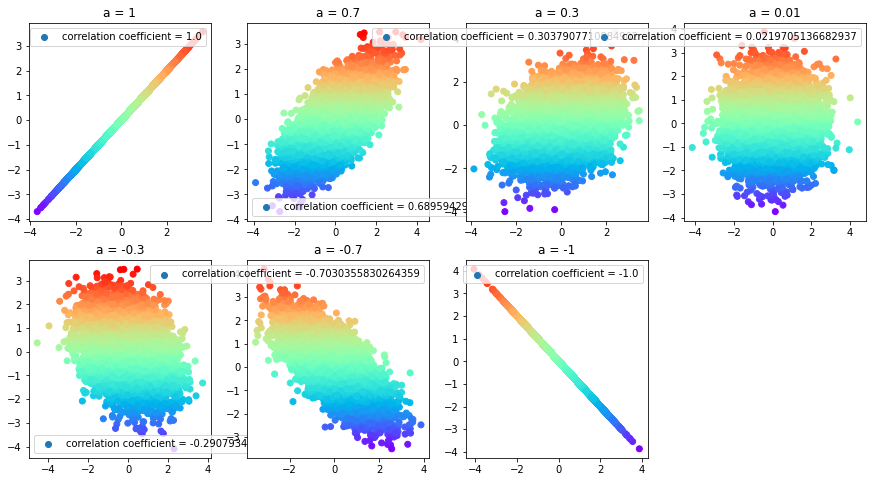

In [23]:
a1 = [1,0.7,0.3,0.01,-0.3,-0.7,-1]
n1 = np.arange(1,8)
plt.figure(figsize= (15,8))


for a, n in zip(a1,n1) :  
  x, y = np.random.multivariate_normal([0, 0], [[1, a], [a, 1]], 10000).T
  print(x.shape, y.shape, len(a1))
  plt.subplot(2,4,n)
  plt.scatter(x,y, c= y,cmap = 'rainbow', label = f'correlation coefficient = {f.Rho(x,y)}')
  plt.title(f'a = {a1[n-1]}')
  plt.legend()


#### **예제 03. 표본 그리기 2**

아래 코드는 표본을 10000개 추출 합니다.



```
x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 10000).T
x.shape, y.shape
```


1. x 표본은 그대로 두고, y 표본에 `1, 0.7, 0.3, 0.01, -0.3, -0.7, -1`을 각각 곱해서 각 표본쌍의 스캐터 플롯 7개를 그리세요.
2. 7가지 경우에 대한 x, y 상관계수를 구하세요.


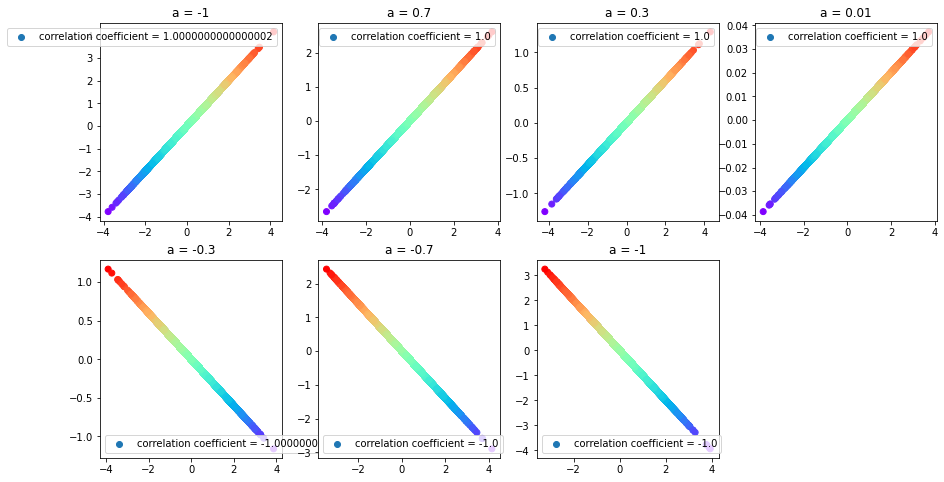

In [24]:
a1 = [-1,0.7,0.3,0.01,-0.3,-0.7,-1]
n1 = np.arange(1,8)
y1 = np.array([1, 0.7, 0.3, 0.01, -0.3, -0.7, -1])
plt.figure(figsize= (15,8))


for y2, n in zip(y1,n1) :
  x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 10000).T
  y = y*y2
  plt.subplot(2,4,n)
  plt.scatter(x,y, c= y,cmap = 'rainbow', label = f'correlation coefficient = {f.Rho(x,y)}')
  plt.title(f'a = {a1[n-1]}')
  plt.legend()
